In [1]:
import sys

!{sys.executable} -m pip install sklearn

     |████████████████████████████████| 7.2 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 8.1 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=375f38e95a6c625e334fd402827be770ce903f8a3be32cfa6e554ff31e593c7e
  Stored in directory: /Users/manjusri/Library/Caches/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [81]:
car_data = pd.read_csv('auto-mpg.csv')
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [82]:
car_data.drop('car name', axis=1, inplace=True) # drop car name column
# replace origin categorical column
car_data['origin'] = car_data['origin'].replace({1:'america', 2: 'europe', 3: 'asia'})
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [83]:
# Create dummy variables for origin categorical column
car_data = pd.get_dummies(car_data, columns=['origin'])
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


# Dealing Missing Values

In [84]:
car_data.isnull().sum() # find out if null values exists

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model year        0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [85]:
car_data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


`In the results of describe function, we are missing the horsepower column even though its a column that has number values, lets look at the data types of the columns `

In [86]:
car_data.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

`python recognised the horsepower column as object instead of int or float which tells us there are some rows with non digit values`

In [87]:
horse_power_is_digit = pd.DataFrame(car_data.horsepower.str.isdigit())
car_data[horse_power_is_digit.horsepower == False] # car data that has horsepower which is not a digit

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [88]:
# Instead of replacing with NAN which doesn't add any value, lets replace it with median of horsepower
# car_data.horsepower.median()

# Replace the values of horsepower where the value is '?' with NAN (Not a Number)
car_data.replace('?', np.nan, inplace=True)
car_data[horse_power_is_digit.horsepower == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [89]:
# car_data.fillna(car_data.horsepower.median(), inplace=True) # this will replace only the horse power rows were we have null values
# But for learning purpose try to replace all the column with its mean where there is a nan
medianFilter = lambda x: x.fillna(x.median())
car_data = car_data.apply(medianFilter, axis=0)
# convert the horsepower data type from object to float
car_data['horsepower'] = car_data['horsepower'].astype('float64')

In [90]:
car_data[car_data['horsepower']==93.5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,93.5,2046,19.0,71,1,0,0
126,21.0,6,200.0,93.5,2875,17.0,74,1,0,0
330,40.9,4,85.0,93.5,1835,17.3,80,0,0,1
336,23.6,4,140.0,93.5,2905,14.3,80,1,0,0
354,34.5,4,100.0,93.5,2320,15.8,81,0,0,1
374,23.0,4,151.0,93.5,3035,20.5,82,1,0,0


# BiVariate Plots

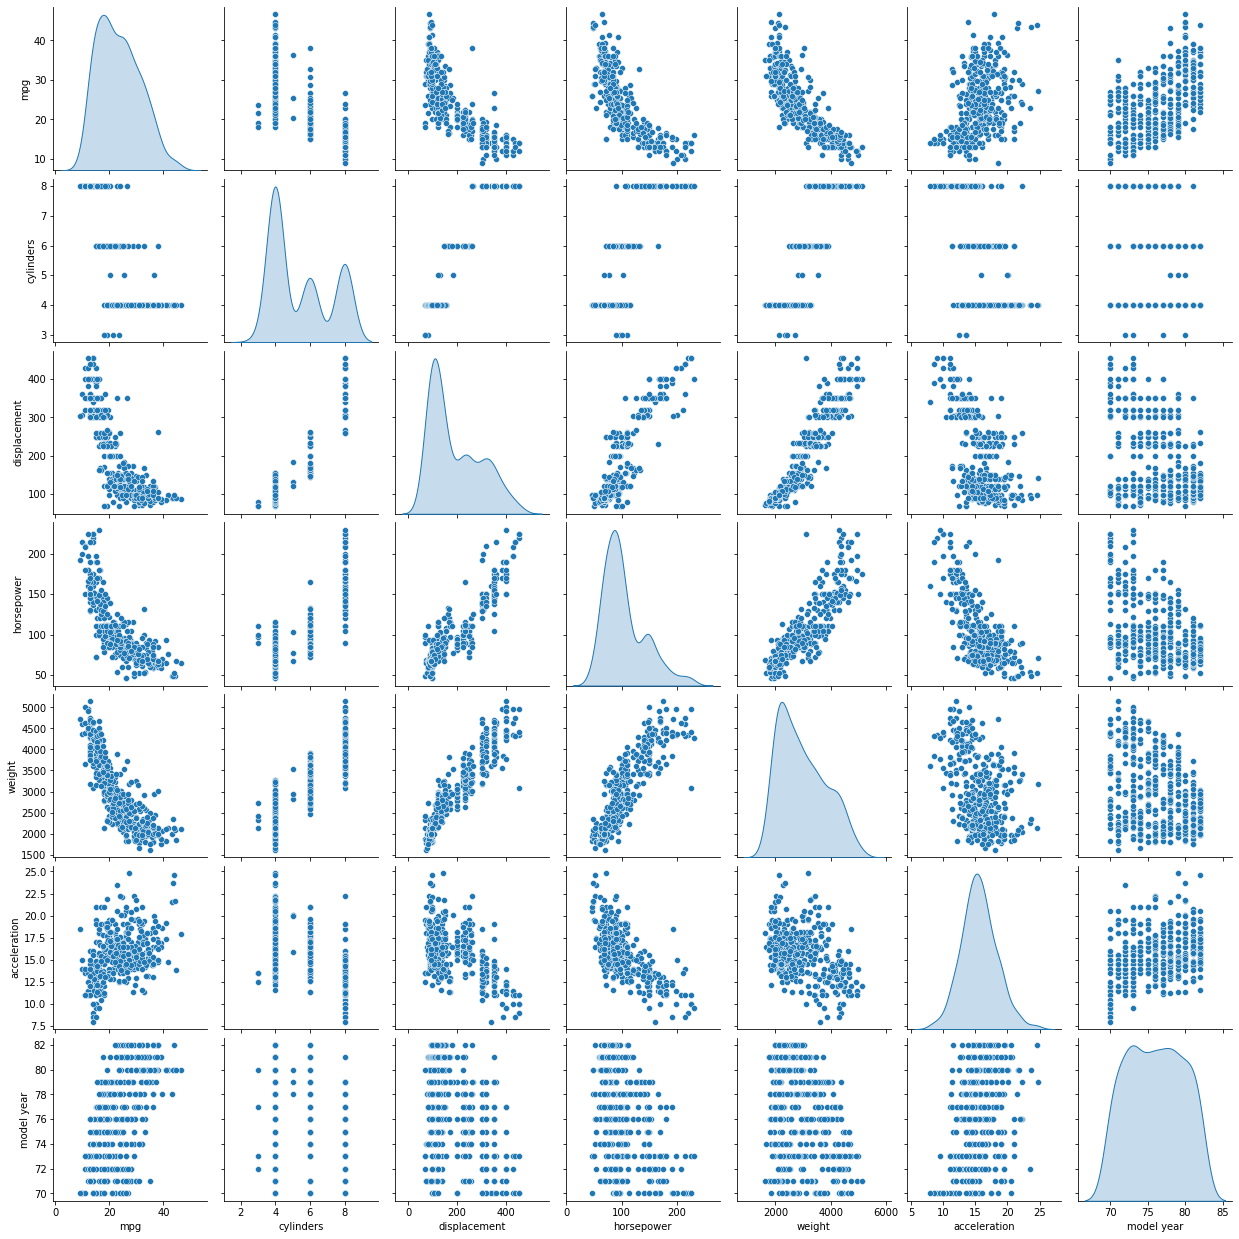

In [91]:
car_data_attr = car_data.columns[:7]
sns.pairplot(car_data[car_data_attr], diag_kind='kde')

# Split Data

In [92]:
# split the dataset dependent (y) vs independent (X) and also drop the additional categorical column (we can choose any
# but here we chose europe)
# independent coulmns
X = car_data.drop(['mpg', 'origin_europe'], axis=1)
# dependent columns
y = car_data['mpg']

In [93]:
# split x and y in to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#the above statement splits the data in to 70:30 ratio for train and test data respectively
# This will select the 70 30 data dandomly, means we are not sure if it took first 30% of the data for test and rest
# for train and viceversa

# Fit Linear Model

In [94]:
regression_model = LinearRegression() # Create a model
regression_model.fit(X_train, y_train) # train the model

LinearRegression()

`print the co efficients of each variable`

In [96]:
regression_model.coef_

array([-0.39480797,  0.02894551, -0.02175221, -0.00735203,  0.06191937,
        0.83693389, -3.001283  , -0.60601796])

In [98]:
for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[idx]))

The coefficient for cylinders is -0.39480796616482666
The coefficient for displacement is 0.028945510765487466
The coefficient for horsepower is -0.02175220772354736
The coefficient for weight is -0.00735203206514735
The coefficient for acceleration is 0.06191936600761837
The coefficient for model year is 0.8369338917645005
The coefficient for origin_america is -3.0012830009185136
The coefficient for origin_asia is -0.6060179643247388


In [100]:
# intercept
print('The interceptor for our model is {}'.format(regression_model.intercept_))

The interceptor for our model is -18.28345111637213


`Find the R-square for train and test data to see if the model fit is good`

In [101]:
regression_model.score(X_train, y_train) #score function will give r-square

0.8141025501610559

In [102]:
regression_model.score(X_test, y_test)

0.8433135132808827

` The R-square of train data is 81% which mean that our model was able to explain 81% of the variance and the test R-sqaure is 84% which means the model did not fall in to overfitting (if test r-square is very low compared to train r-square we can say that the model did overfitting with the train data)`

`But there is a possiblity that the model could be underfit, so to do a better fit, we can try adding other non linear terms`

In [107]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True) # degree2 means it will include x1^2, x2^2, x1x2..etc
# with interaction_only=True, it will only include x1x2,x1x3..etc terms

# Transform and fit the x train and test data
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

# create a new model 
poly_regression_model = LinearRegression()

#fit the new model using the new x train data
poly_regression_model.fit(X_train2, y_train)

# predict y
y_predict = poly_regression_model.predict(X_test2)

print ('The train R^2 with interaction terms: {}'.format(poly_regression_model.score(X_train2, y_train)))

The train R^2 with interaction terms: 0.9015975293478813


In [108]:
print ('The test R^2 with interaction terms: {}'.format(poly_regression_model.score(X_test2, y_test)))

The test R^2 with interaction terms: 0.8647441061037147


` The R^2 for training data increased but the testing data R^2 is little low compared to the traing data for the new model. But the R^2 testing data with new model increased 2% compared to old model which means the new model is better fit compared to the old model`

In [110]:
print(X_train.shape)
print(X_train2.shape)
# we have added 29 new attributes in th new model to get 2% increase in explaining the variability of the data
# We can argue adding 29 new attributes to the model (means increasing the model complexity) is too much for an increase
# of 2%

(278, 8)
(278, 37)
